In [431]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import wave

In [432]:
obj = wave.open("audio.wav", "rb")

In [433]:
obj.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=526073, comptype='NONE', compname='not compressed')

In [434]:
frames = obj.readframes(-1)

In [435]:
len(frames)

2104292

In [436]:
type(frames)

bytes

In [437]:
fr = np.frombuffer(frames, dtype=np.int16)
fr = fr.copy()

fr = np.repeat(fr[::2],2)

channel_left = fr[::2]
channel_right = fr[1::2]


print(fr[:10])
print(channel_left[:10])
print(channel_right[:10])

[-1 -1  3  3 -5 -5  7  7 -8 -8]
[-1  3 -5  7 -8  7 -6  5 -3  1]
[-1  3 -5  7 -8  7 -6  5 -3  1]


In [438]:
print(len(fr), type(fr))
print(len(channel_left), type(fr))
print(len(channel_right), type(fr))

1052146 <class 'numpy.ndarray'>
526073 <class 'numpy.ndarray'>
526073 <class 'numpy.ndarray'>


In [439]:
volumeFactor = 1
multiplier = pow(2, (np.sqrt(np.sqrt(np.sqrt(volumeFactor))) * 192 - 192)/6)

tmp = channel_left.copy()
channel_left[:] = tmp * multiplier
print(channel_left[:20])

[-1  3 -5  7 -8  7 -6  5 -3  1  0 -1  1  0 -1  1 -1  1  0 -1]


In [440]:
print(fr[:20])

[-1 -1  3  3 -5 -5  7  7 -8 -8  7  7 -6 -6  5  5 -3 -3  1  1]


In [441]:
def transform_left_channel(channel, transformation= np.sin):
    rot_speed = 2
    step = np.pi/(526073/rot_speed)
    wave_val = np.arange(0,np.pi, step)
    wave_val = np.tile(wave_val, rot_speed)
    wave_val = transformation(wave_val)
    for i,val in enumerate(wave_val):
        wave_val[i] = pow(2, (np.sqrt(np.sqrt(np.sqrt(val))) * 192 - 192)/6)
    tmp = channel.copy()
    for i, val in enumerate(tmp):
        tmp[i] = val*wave_val[i]
    return wave_val, tmp

def transform_right_channel(channel, transformation= np.sin):
    rot_speed = 2
    step = np.pi/(526073/rot_speed)
    wave_val = np.arange(0,np.pi, step)
    wave_val = np.tile(wave_val, rot_speed)
    wave_val = transformation(wave_val)
    for i,val in enumerate(wave_val):
        wave_val[i] = pow(2, (np.sqrt(np.sqrt(np.sqrt(1-val))) * 192 - 192)/6)
    tmp = channel.copy()
    for i, val in enumerate(tmp):
        tmp[i] = val*wave_val[i]
    return tmp

In [442]:
wave_val, channel_left_transformed = transform_left_channel(channel_left, transformation=np.sin)
channel_right_transformed = transform_right_channel(channel_right, transformation=np.sin)

channel_left[:] = channel_left_transformed
channel_right[:] = channel_right_transformed

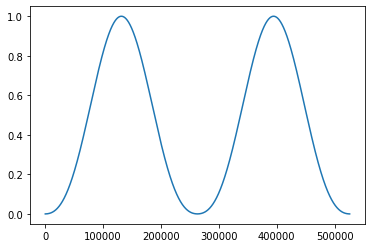

In [443]:
plt.plot(wave_val)

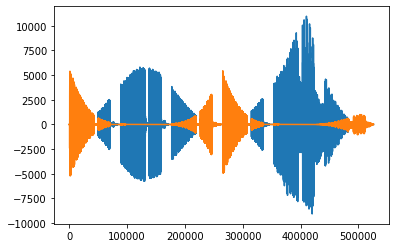

In [444]:
plt.figure()
plt.plot(channel_left)
plt.plot(channel_right)
plt.show()

In [445]:
print(len(fr))

1052146


In [446]:
obj_new = wave.open("output2.wav", "wb")

obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(44100.0)
obj_new.writeframes(b''.join(fr))

In [447]:
Audio(filename="output2.wav")